In [34]:
import cv2
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [35]:
transform = transforms.Compose([transforms.ToTensor()])
mnist = torchvision.datasets.MNIST(root='./../datasets', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(mnist, batch_size=1000, shuffle=True)

images, labels = next(iter(dataloader))


Model Accuracy: 1.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00       106
           4       1.00      1.00      1.00       102
           5       1.00      1.00      1.00       111
           6       1.00      1.00      1.00        86
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        82
           9       1.00      1.00      1.00        94

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



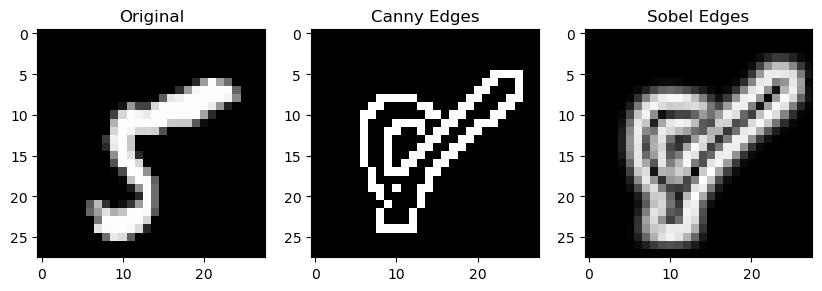

In [36]:
images = images.squeeze().numpy()  # Convert to numpy array

# Apply Canny and Sobel edge detection
edge_features = []
for img in images:
    # Convert to uint8 (Canny requires uint8 format)
    img_uint8 = (img * 255).astype(np.uint8)
    
    # Apply Canny edge detection
    # canny_edges = cv2.Canny(img_uint8, 50, 150)
    
    # # Apply Sobel edge detection (gradient magnitude)
    # sobelx = cv2.Sobel(img_uint8, cv2.CV_64F, 1, 0, ksize=3)
    # sobely = cv2.Sobel(img_uint8, cv2.CV_64F, 0, 1, ksize=3)
    # sobel_edges = np.sqrt(sobelx**2 + sobely**2)
        # **Step 1: Apply Gaussian Blur to reduce noise**
    img_blur = cv2.GaussianBlur(img_uint8, (3, 3), 0)
    
    # **Step 2: Apply Canny Edge Detection**
    canny_edges = cv2.Canny(img_blur, 50, 150)
    
    # **Step 3: Apply Sobel Edge Detection**
    sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = np.sqrt(sobelx**2 + sobely**2)  # Gradient Magnitude
    
    # Flatten features
    edge_features.append(sobel_edges.flatten())

edge_features = np.array(edge_features)

# Train SVM classifier
clf = SVC(kernel='linear')
clf.fit(edge_features, labels.numpy())

# Evaluate accuracy
preds = clf.predict(edge_features)
accuracy = accuracy_score(labels.numpy(), preds)
print(f"Model Accuracy: {accuracy:.4f}")
# Print precision, recall, F1-score
print("\nClassification Report:\n")
print(classification_report(labels.numpy(), preds))

# Show sample images with Canny and Sobel applied
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(images[0], cmap='gray')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edges")

plt.subplot(1, 3, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edges")

plt.show()

In [37]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # K=5
knn.fit(edge_features, labels.numpy())

# Make predictions
preds = knn.predict(edge_features)

# Compute metrics
accuracy = accuracy_score(labels.numpy(), preds)
print(f"Model Accuracy: {accuracy:.4f}")

# Print precision, recall, F1-score
print("\nClassification Report:\n")
print(classification_report(labels.numpy(), preds))

Model Accuracy: 0.9110

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       103
           1       0.94      0.98      0.96       117
           2       0.95      0.93      0.94        95
           3       0.94      0.87      0.90       106
           4       0.88      0.86      0.87       102
           5       0.93      0.86      0.89       111
           6       0.91      0.99      0.95        86
           7       0.92      0.94      0.93       104
           8       0.90      0.79      0.84        82
           9       0.82      0.88      0.85        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

